In [2]:
# importing all the essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Part 1

In [3]:
# Reading the meta data
df = pd.read_csv("meta_data.csv")
df

,Sample_geo_accession,age_months,gender,infection_status
0,GSM844133,4.40,M,rsv
1,GSM844134,2.00,F,rsv
2,GSM844135,13.78,F,rsv
3,GSM844136,72.00,M,none
4,GSM844137,19.00,F,none
...,...,...,...,...
96,GSM844229,1.97,F,rsv
97,GSM844230,9.73,M,rsv
98,GSM844231,18.00,F,influenza
99,GSM844232,120.00,F,influenza


In [4]:
# checking the shape of the data
df.shape

(101, 4)

In [5]:
# separating individual id which have only rsv infection
df_rsv = list(df['infection_status'] == 'rsv')
l_rsv = []
for i in range(len(df)):
    if df_rsv[i]:
        l_rsv.append(df['Sample_geo_accession'][i])

In [6]:
print(df_rsv) # this is boolean datatype structure containg true and false only

[True, True, True, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, True, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, False, True, True, True, True, True, True, False, True, True, True, True, False, True, True, False, False, False, False, False, False, False, False, True, False, False, False, True, True, True, True, True, True, True, True, True, True, True, False, False, False, True, False, True, False, False, False, False, False, False, True, True, False, False, False]


In [7]:
print(l_rsv)

['GSM844133', 'GSM844134', 'GSM844135', 'GSM844145', 'GSM844146', 'GSM844157', 'GSM844158', 'GSM844159', 'GSM844162', 'GSM844163', 'GSM844164', 'GSM844165', 'GSM844166', 'GSM844167', 'GSM844168', 'GSM844169', 'GSM844172', 'GSM844173', 'GSM844174', 'GSM844175', 'GSM844176', 'GSM844177', 'GSM844178', 'GSM844180', 'GSM844181', 'GSM844182', 'GSM844183', 'GSM844184', 'GSM844185', 'GSM844187', 'GSM844188', 'GSM844189', 'GSM844190', 'GSM844192', 'GSM844193', 'GSM844202', 'GSM844206', 'GSM844207', 'GSM844208', 'GSM844209', 'GSM844210', 'GSM844211', 'GSM844212', 'GSM844213', 'GSM844214', 'GSM844215', 'GSM844216', 'GSM844220', 'GSM844222', 'GSM844229', 'GSM844230']


In [8]:
len(l_rsv)

51

##### You see the length of rsv is 51 that indicates total 51 children has rsv infection

In [9]:
df_flu = list(df['infection_status'] == 'influenza')
l_flu = []
for i in range(len(df)):
    if df_flu[i]:
        l_flu.append(df['Sample_geo_accession'][i])

In [10]:
print(l_flu)

['GSM844147', 'GSM844148', 'GSM844149', 'GSM844150', 'GSM844151', 'GSM844152', 'GSM844153', 'GSM844154', 'GSM844155', 'GSM844156', 'GSM844160', 'GSM844161', 'GSM844179', 'GSM844186', 'GSM844191', 'GSM844217', 'GSM844218', 'GSM844219', 'GSM844221', 'GSM844223', 'GSM844224', 'GSM844225', 'GSM844226', 'GSM844227', 'GSM844228', 'GSM844231', 'GSM844232', 'GSM844233']


In [11]:
len(l_flu)

28

In [12]:
# Reading matrix datafile
df_matrix = pd.read_csv('GSE34205_series_matrix_clean.txt',sep='\t',nrows = 1000,index_col = 0)

In [13]:
# To access first five elements only
df_matrix.head()

,GSM844133,GSM844134,GSM844135,GSM844136,GSM844137,GSM844138,GSM844139,GSM844140,GSM844141,GSM844142,...,GSM844224,GSM844225,GSM844226,GSM844227,GSM844228,GSM844229,GSM844230,GSM844231,GSM844232,GSM844233
ID_REF,,,,,,,,,,,,,,,,,,,,,
1007_s_at,1.180340,1.344423,0.630435,1.343077,1.365897,1.606805,2.179487,0.534215,0.724615,1.274858,...,1.394872,0.785128,0.774359,1.275897,1.084102,1.053308,0.542155,0.886667,0.698718,1.099487
1053_at,0.951730,0.993080,1.171978,0.745698,1.148742,1.032721,1.000000,0.683639,0.661979,0.961982,...,1.090007,1.203011,1.055592,0.940437,1.392455,0.929346,1.229731,1.031932,1.001820,0.618134
117_at,1.027560,0.861533,1.588108,0.598934,1.000000,0.689828,0.595187,1.133957,0.978383,0.917655,...,0.116443,1.438968,0.697795,0.323101,0.952155,0.346751,0.890095,0.292405,1.669981,0.380458
121_at,0.573574,1.043946,0.494884,2.383290,2.762236,1.460287,2.872575,1.083843,2.132059,1.456901,...,0.834781,1.170432,1.215175,1.230959,1.571098,0.701730,0.619949,0.819143,0.831885,1.091370
1255_g_at,1.824653,0.314236,0.241319,1.000000,2.750943,1.413194,3.071698,1.029514,2.237736,0.626736,...,1.283019,0.237736,0.279245,2.822642,2.656604,0.213542,0.104167,1.437736,1.494340,0.992453


In [14]:
# accessing last five elements
df_matrix.tail()

,GSM844133,GSM844134,GSM844135,GSM844136,GSM844137,GSM844138,GSM844139,GSM844140,GSM844141,GSM844142,...,GSM844224,GSM844225,GSM844226,GSM844227,GSM844228,GSM844229,GSM844230,GSM844231,GSM844232,GSM844233
ID_REF,,,,,,,,,,,,,,,,,,,,,
1553618_at,0.364516,2.683871,0.600000,1.818182,3.518182,3.480645,9.809092,0.529032,1.490909,0.867742,...,0.900000,0.545455,1.154545,1.145455,0.800000,2.809677,0.390323,2.645455,2.218182,0.736364
1553619_a_at,1.919510,2.171478,1.471566,0.354386,1.887719,1.842520,1.847368,0.278215,0.278947,2.446194,...,1.207018,0.850877,0.557895,2.042105,0.201754,2.404199,1.494313,0.431579,1.689474,0.447368
1553620_at,1.782946,1.782946,1.178295,0.461539,1.000000,1.116279,1.107692,1.627907,1.615385,0.620155,...,2.107692,2.584615,1.353846,0.784615,0.353846,6.279070,1.317829,0.415385,1.200000,0.507692
1553622_a_at,2.666667,3.186147,5.255412,0.173228,1.881890,1.099567,1.000000,4.683983,4.259843,0.926407,...,0.740157,0.834646,8.015747,5.173228,1.850394,0.597403,3.679654,1.787402,2.771654,0.393701
1553623_at,1.362577,0.350925,1.326936,0.349328,1.925144,1.369431,1.917466,0.714188,1.000000,1.247430,...,0.357006,1.026871,2.562380,1.961612,0.249520,2.148047,0.663468,2.149712,0.689060,0.927063


In [15]:
df_matrix.shape

(1000, 101)

In [16]:
# Creating a dataframe of sample id's of child having influenza infection
flu_df = df_matrix[['GSM844147','GSM844148','GSM844149','GSM844150','GSM844151','GSM844152','GSM844153',
                   'GSM844154','GSM844155','GSM844156','GSM844160','GSM844161','GSM844179','GSM844186','GSM844191',
                   'GSM844217','GSM844218','GSM844219','GSM844221','GSM844223','GSM844224','GSM844225','GSM844226',
                   'GSM844227','GSM844228','GSM844231','GSM844232','GSM844233']]
flu_df.head()

,GSM844147,GSM844148,GSM844149,GSM844150,GSM844151,GSM844152,GSM844153,GSM844154,GSM844155,GSM844156,...,GSM844221,GSM844223,GSM844224,GSM844225,GSM844226,GSM844227,GSM844228,GSM844231,GSM844232,GSM844233
ID_REF,,,,,,,,,,,,,,,,,,,,,
1007_s_at,1.162821,1.668462,1.495898,1.000256,1.028974,1.049744,1.232564,1.257179,1.324872,1.043590,...,0.685641,0.971026,1.394872,0.785128,0.774359,1.275897,1.084102,0.886667,0.698718,1.099487
1053_at,1.023329,0.579914,0.802283,0.847452,0.732793,0.939279,0.851257,0.687790,0.922733,1.376406,...,0.663964,1.312045,1.090007,1.203011,1.055592,0.940437,1.392455,1.031932,1.001820,0.618134
117_at,0.426574,1.809050,2.525003,1.452371,0.841332,0.850987,0.805015,0.924773,0.765528,0.461882,...,1.016861,0.825191,0.116443,1.438968,0.697795,0.323101,0.952155,0.292405,1.669981,0.380458
121_at,2.137272,2.070084,1.835795,2.275847,2.253548,2.229945,2.062120,2.609904,2.318998,2.132349,...,1.251231,0.961338,0.834781,1.170432,1.215175,1.230959,1.571098,0.819143,0.831885,1.091370
1255_g_at,1.079245,2.215094,2.675472,2.011321,0.977359,1.683019,0.822642,1.037736,0.411321,1.200000,...,0.249057,1.366038,1.283019,0.237736,0.279245,2.822642,2.656604,1.437736,1.494340,0.992453


In [17]:
# Creating a dataframe of sample id's of child having rsv infection
rsv_df = df_matrix[['GSM844133','GSM844134','GSM844135','GSM844145','GSM844146','GSM844157',
                    'GSM844158','GSM844159','GSM844162','GSM844163','GSM844164','GSM844165',
                    'GSM844166','GSM844167','GSM844168','GSM844169','GSM844172','GSM844173',
                    'GSM844174','GSM844175','GSM844176','GSM844177','GSM844178','GSM844180',
                    'GSM844181','GSM844182','GSM844183','GSM844184','GSM844185','GSM844187',
                    'GSM844188','GSM844189','GSM844190','GSM844192','GSM844193','GSM844202',
                    'GSM844206','GSM844207','GSM844208','GSM844209','GSM844210','GSM844211',
                    'GSM844212','GSM844213','GSM844214','GSM844215','GSM844216','GSM844220',
                    'GSM844222','GSM844229','GSM844230']]
rsv_df.head()

,GSM844133,GSM844134,GSM844135,GSM844145,GSM844146,GSM844157,GSM844158,GSM844159,GSM844162,GSM844163,...,GSM844211,GSM844212,GSM844213,GSM844214,GSM844215,GSM844216,GSM844220,GSM844222,GSM844229,GSM844230
ID_REF,,,,,,,,,,,,,,,,,,,,,
1007_s_at,1.180340,1.344423,0.630435,0.619660,0.760491,0.776560,0.766163,0.962949,1.355009,1.378072,...,0.704348,0.633837,0.584877,0.726654,0.888280,0.497354,0.480718,0.804915,1.053308,0.542155
1053_at,0.951730,0.993080,1.171978,1.277745,1.246305,0.766681,1.508415,1.589235,0.880478,0.707048,...,1.010166,1.289534,0.952755,1.066553,0.923024,0.767706,1.270568,1.125844,0.929346,1.229731
117_at,1.027560,0.861533,1.588108,0.411391,1.172540,2.155169,0.348923,1.228495,0.697344,0.412895,...,0.685652,1.792885,0.788208,0.357775,1.143645,0.612160,0.735427,0.685819,0.346751,0.890095
121_at,0.573574,1.043946,0.494884,0.442621,0.739198,0.302245,0.435186,0.423703,1.505263,1.480751,...,0.604932,0.581671,0.739713,0.641884,0.705263,0.761207,0.517114,0.684947,0.701730,0.619949
1255_g_at,1.824653,0.314236,0.241319,0.239583,0.274306,0.095486,0.597222,0.767361,2.241320,1.052083,...,0.286458,0.098958,1.508681,1.697917,0.206597,1.427083,0.390625,1.034722,0.213542,0.104167


In [18]:
# Professor code snippets
df_matrix = df_matrix.assign(mean_rsv_ratio=np.zeros(len(df_matrix)))
df_matrix = df_matrix.assign(mean_flu_ratio=np.zeros(len(df_matrix)))
df_matrix = df_matrix.assign(p_value_rsv=np.zeros(len(df_matrix)))
df_matrix = df_matrix.assign(corrected_p_value_rsv=np.zeros(len(df_matrix)))
df_matrix = df_matrix.assign(p_value_flu=np.zeros(len(df_matrix)))
df_matrix = df_matrix.assign(corrected_p_value_flu=np.zeros(len(df_matrix)))
df_matrix["Selected_flu_feature"] = False
df_matrix["Selected_rsv_feature"] = False
df_matrix["Selected_feature"] = False

In [19]:
df_matrix.head()

,GSM844133,GSM844134,GSM844135,GSM844136,GSM844137,GSM844138,GSM844139,GSM844140,GSM844141,GSM844142,...,GSM844233,mean_rsv_ratio,mean_flu_ratio,p_value_rsv,corrected_p_value_rsv,p_value_flu,corrected_p_value_flu,Selected_flu_feature,Selected_rsv_feature,Selected_feature
ID_REF,,,,,,,,,,,,,,,,,,,,,
1007_s_at,1.180340,1.344423,0.630435,1.343077,1.365897,1.606805,2.179487,0.534215,0.724615,1.274858,...,1.099487,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False
1053_at,0.951730,0.993080,1.171978,0.745698,1.148742,1.032721,1.000000,0.683639,0.661979,0.961982,...,0.618134,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False
117_at,1.027560,0.861533,1.588108,0.598934,1.000000,0.689828,0.595187,1.133957,0.978383,0.917655,...,0.380458,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False
121_at,0.573574,1.043946,0.494884,2.383290,2.762236,1.460287,2.872575,1.083843,2.132059,1.456901,...,1.091370,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False
1255_g_at,1.824653,0.314236,0.241319,1.000000,2.750943,1.413194,3.071698,1.029514,2.237736,0.626736,...,0.992453,0.0,0.0,0.0,0.0,0.0,0.0,False,False,False


In [20]:
# Finding mean_rsv ratio
for i in range(len(rsv_df)):
    rsv_log = np.log(rsv_df.iloc[i,0:])
    mean_rsv_ratio = np.mean(rsv_log)
    df_matrix['mean_rsv_ratio'][i] = mean_rsv_ratio
    print("Log value of rsv_data:\n",rsv_log)
    print("Mean of rsv_data:\n",mean_rsv_ratio)

Log value of rsv_data:
 GSM844133    0.165803
GSM844134    0.295965
GSM844135   -0.461346
GSM844145   -0.478585
GSM844146   -0.273790
GSM844157   -0.252882
GSM844158   -0.266361
GSM844159   -0.037755
GSM844162    0.303808
GSM844163    0.320685
GSM844164    0.054266
GSM844165   -0.419936
GSM844166    0.033095
GSM844167   -0.013704
GSM844168   -0.252152
GSM844169   -0.100123
GSM844172   -0.277276
GSM844173    0.057841
GSM844174   -0.254587
GSM844175    0.143126
GSM844176   -0.573559
GSM844177   -0.667026
GSM844178   -0.292356
GSM844180   -0.039327
GSM844181   -0.159078
GSM844182   -0.167312
GSM844183    0.019840
GSM844184   -0.188998
GSM844185    0.009033
GSM844187    0.360618
GSM844188   -0.475235
GSM844189   -0.440867
GSM844190   -0.292862
GSM844192   -0.364537
GSM844193   -0.216314
GSM844202   -0.725811
GSM844206   -0.919130
GSM844207    0.192353
GSM844208   -0.380450
GSM844209    0.251104
GSM844210   -0.063405
GSM844211   -0.350483
GSM844212   -0.455963
GSM844213   -0.536353
GSM84421

In [21]:
# Calculating mean flu ratio
for i in range(len(flu_df)):
    flu_log = np.log(flu_df.iloc[i,0:])
    mean_flu_ratio = np.mean(flu_log)
    df_matrix['mean_flu_ratio'][i] = mean_flu_ratio
    print("Log value of flu_data:\n",rsv_log)
    print("Mean of flu_data:\n",mean_rsv_ratio)

Log value of flu_data:
 GSM844133    0.309378
GSM844134   -1.047182
GSM844135    0.282873
GSM844145   -0.138734
GSM844146   -1.031678
GSM844157   -0.418573
GSM844158   -0.925933
GSM844159    0.003421
GSM844162    0.223281
GSM844163    0.290078
GSM844164    0.408886
GSM844165    0.813744
GSM844166   -1.694520
GSM844167    0.294172
GSM844168   -0.266210
GSM844169    0.635303
GSM844172   -1.043283
GSM844173   -0.494285
GSM844174   -2.185640
GSM844175   -0.044140
GSM844176   -1.724825
GSM844177   -0.357949
GSM844178   -1.813236
GSM844180   -0.197098
GSM844181   -0.257305
GSM844182   -0.377751
GSM844183   -0.540270
GSM844184   -1.189682
GSM844185   -2.680336
GSM844187   -2.197910
GSM844188   -1.665106
GSM844189   -0.202119
GSM844190   -0.039851
GSM844192    0.065652
GSM844193    0.518337
GSM844202   -0.048448
GSM844206   -0.219040
GSM844207    0.712829
GSM844208   -0.375753
GSM844209    0.889760
GSM844210   -0.244970
GSM844211    0.298250
GSM844212    0.573907
GSM844213    0.461226
GSM84421

In [22]:
df_matrix

,GSM844133,GSM844134,GSM844135,GSM844136,GSM844137,GSM844138,GSM844139,GSM844140,GSM844141,GSM844142,...,GSM844233,mean_rsv_ratio,mean_flu_ratio,p_value_rsv,corrected_p_value_rsv,p_value_flu,corrected_p_value_flu,Selected_flu_feature,Selected_rsv_feature,Selected_feature
ID_REF,,,,,,,,,,,,,,,,,,,,,
1007_s_at,1.180340,1.344423,0.630435,1.343077,1.365897,1.606805,2.179487,0.534215,0.724615,1.274858,...,1.099487,-0.212471,0.027788,0.0,0.0,0.0,0.0,False,False,False
1053_at,0.951730,0.993080,1.171978,0.745698,1.148742,1.032721,1.000000,0.683639,0.661979,0.961982,...,0.618134,-0.007053,-0.031594,0.0,0.0,0.0,0.0,False,False,False
117_at,1.027560,0.861533,1.588108,0.598934,1.000000,0.689828,0.595187,1.133957,0.978383,0.917655,...,0.380458,-0.004678,-0.173734,0.0,0.0,0.0,0.0,False,False,False
121_at,0.573574,1.043946,0.494884,2.383290,2.762236,1.460287,2.872575,1.083843,2.132059,1.456901,...,1.091370,-0.498851,0.348957,0.0,0.0,0.0,0.0,False,False,False
1255_g_at,1.824653,0.314236,0.241319,1.000000,2.750943,1.413194,3.071698,1.029514,2.237736,0.626736,...,0.992453,-0.644094,0.150891,0.0,0.0,0.0,0.0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553618_at,0.364516,2.683871,0.600000,1.818182,3.518182,3.480645,9.809092,0.529032,1.490909,0.867742,...,0.736364,-0.153961,0.618297,0.0,0.0,0.0,0.0,False,False,False
1553619_a_at,1.919510,2.171478,1.471566,0.354386,1.887719,1.842520,1.847368,0.278215,0.278947,2.446194,...,0.447368,-0.314130,-0.707614,0.0,0.0,0.0,0.0,False,False,False
1553620_at,1.782946,1.782946,1.178295,0.461539,1.000000,1.116279,1.107692,1.627907,1.615385,0.620155,...,0.507692,-0.039019,-0.221508,0.0,0.0,0.0,0.0,False,False,False


In [23]:
df_matrix['mean_rsv_ratio']

ID_REF
1007_s_at      -0.212471
1053_at        -0.007053
117_at         -0.004678
121_at         -0.498851
1255_g_at      -0.644094
                  ...   
1553618_at     -0.153961
1553619_a_at   -0.314130
1553620_at     -0.039019
1553622_a_at    0.325351
1553623_at     -0.389271
Name: mean_rsv_ratio, Length: 1000, dtype: float64

In [24]:
# Finding p value and corrected p value for rsv
from scipy import stats
for i in range(len(rsv_df)):
    rsv_p = stats.ttest_1samp(np.log(rsv_df.iloc[i, 0:]), 0.0).pvalue
    df_matrix['p_value_rsv'][i] = rsv_p
    df_matrix['corrected_p_value_rsv'][i] = rsv_p*len(df_matrix)
    print(rsv_p)

8.096639768080611e-06
0.8455252311532773
0.9549101422071945
1.909441331013528e-09
6.138760470173378e-05
0.00021091555199795055
0.5244652256313341
0.5109310586468201
0.5180636997309852
2.225031622760058e-05
0.00021461226059652386
2.4145072683408203e-06
0.07210974173839745
0.2462502420138241
5.356561026545032e-08
0.003373367362554255
1.0986380291263328e-05
0.011443372080169678
4.911396858479809e-05
0.019918075610892087
0.34203043341755957
0.40241675813301114
0.00048220746043179584
0.12162181578835878
0.18487944117334146
0.0005131397873749572
0.02152227477320261
0.28439180627917715
8.573122755983386e-05
0.009063591220534909
0.023933827175495775
0.02260034256272224
0.03392639821371415
0.010992980655240694
0.6398421701776933
1.6314768370988353e-05
0.47619763932985404
0.3389942741537405
2.9742460708448375e-10
0.00025735172875648626
2.5138064425998592e-06
0.0018340732893653163
0.29677663552532957
0.00017309332178159625
3.3477773014327187e-07
0.322027330125578
0.5456731300186892
1.047504941999

In [25]:
df_matrix

,GSM844133,GSM844134,GSM844135,GSM844136,GSM844137,GSM844138,GSM844139,GSM844140,GSM844141,GSM844142,...,GSM844233,mean_rsv_ratio,mean_flu_ratio,p_value_rsv,corrected_p_value_rsv,p_value_flu,corrected_p_value_flu,Selected_flu_feature,Selected_rsv_feature,Selected_feature
ID_REF,,,,,,,,,,,,,,,,,,,,,
1007_s_at,1.180340,1.344423,0.630435,1.343077,1.365897,1.606805,2.179487,0.534215,0.724615,1.274858,...,1.099487,-0.212471,0.027788,8.096640e-06,0.008097,0.0,0.0,False,False,False
1053_at,0.951730,0.993080,1.171978,0.745698,1.148742,1.032721,1.000000,0.683639,0.661979,0.961982,...,0.618134,-0.007053,-0.031594,8.455252e-01,845.525231,0.0,0.0,False,False,False
117_at,1.027560,0.861533,1.588108,0.598934,1.000000,0.689828,0.595187,1.133957,0.978383,0.917655,...,0.380458,-0.004678,-0.173734,9.549101e-01,954.910142,0.0,0.0,False,False,False
121_at,0.573574,1.043946,0.494884,2.383290,2.762236,1.460287,2.872575,1.083843,2.132059,1.456901,...,1.091370,-0.498851,0.348957,1.909441e-09,0.000002,0.0,0.0,False,False,False
1255_g_at,1.824653,0.314236,0.241319,1.000000,2.750943,1.413194,3.071698,1.029514,2.237736,0.626736,...,0.992453,-0.644094,0.150891,6.138760e-05,0.061388,0.0,0.0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553618_at,0.364516,2.683871,0.600000,1.818182,3.518182,3.480645,9.809092,0.529032,1.490909,0.867742,...,0.736364,-0.153961,0.618297,2.147879e-01,214.787947,0.0,0.0,False,False,False
1553619_a_at,1.919510,2.171478,1.471566,0.354386,1.887719,1.842520,1.847368,0.278215,0.278947,2.446194,...,0.447368,-0.314130,-0.707614,1.379310e-02,13.793100,0.0,0.0,False,False,False
1553620_at,1.782946,1.782946,1.178295,0.461539,1.000000,1.116279,1.107692,1.627907,1.615385,0.620155,...,0.507692,-0.039019,-0.221508,6.929750e-01,692.974991,0.0,0.0,False,False,False


In [26]:
# Finding p value and corrected p value for flu
for i in range(len(flu_df)):
    flu_p = stats.ttest_1samp(np.log(flu_df.iloc[i, 0:]), 0.0).pvalue
    df_matrix['p_value_flu'][i] = flu_p
    df_matrix['corrected_p_value_flu'][i] = flu_p*len(df_matrix)
    print(flu_p)

0.5261553756483981
0.5267819951977077
0.1880147149750362
0.0003026255760651959
0.30220282060489567
0.0029768971480879157
0.07032806974768202
0.021912933604137604
0.5487998337501404
0.5382952378762964
0.5113428736660157
0.4689184326766441
0.14740384965669762
0.0009189088602565595
0.28595001525819486
0.0008629690105670327
0.002031660481736559
0.10404244134664341
0.7192523505885942
0.1564274497736649
0.00016801862077696708
0.0059916489112557874
0.3399123439456737
0.00014516715164751117
0.3063410509732585
0.0043509578781120465
0.04297696986745187
0.31900475179370663
0.021856485759984362
0.15010890460762044
0.221585359359662
0.8170673974142634
0.7965207045982783
0.6402431875827765
0.18967254602606198
0.03921577584816543
0.21865522115360111
0.5654756837234955
0.00689935904472689
0.015678312917395288
0.004230516610558307
0.009151941453494601
1.50020937394008e-08
0.00016553754017147133
0.00013686861094661177
0.1089280079899493
0.00010454726578261671
2.3005686423444164e-07
8.522129249097814e-05

In [27]:
df_matrix

,GSM844133,GSM844134,GSM844135,GSM844136,GSM844137,GSM844138,GSM844139,GSM844140,GSM844141,GSM844142,...,GSM844233,mean_rsv_ratio,mean_flu_ratio,p_value_rsv,corrected_p_value_rsv,p_value_flu,corrected_p_value_flu,Selected_flu_feature,Selected_rsv_feature,Selected_feature
ID_REF,,,,,,,,,,,,,,,,,,,,,
1007_s_at,1.180340,1.344423,0.630435,1.343077,1.365897,1.606805,2.179487,0.534215,0.724615,1.274858,...,1.099487,-0.212471,0.027788,8.096640e-06,0.008097,0.526155,526.155376,False,False,False
1053_at,0.951730,0.993080,1.171978,0.745698,1.148742,1.032721,1.000000,0.683639,0.661979,0.961982,...,0.618134,-0.007053,-0.031594,8.455252e-01,845.525231,0.526782,526.781995,False,False,False
117_at,1.027560,0.861533,1.588108,0.598934,1.000000,0.689828,0.595187,1.133957,0.978383,0.917655,...,0.380458,-0.004678,-0.173734,9.549101e-01,954.910142,0.188015,188.014715,False,False,False
121_at,0.573574,1.043946,0.494884,2.383290,2.762236,1.460287,2.872575,1.083843,2.132059,1.456901,...,1.091370,-0.498851,0.348957,1.909441e-09,0.000002,0.000303,0.302626,False,False,False
1255_g_at,1.824653,0.314236,0.241319,1.000000,2.750943,1.413194,3.071698,1.029514,2.237736,0.626736,...,0.992453,-0.644094,0.150891,6.138760e-05,0.061388,0.302203,302.202821,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553618_at,0.364516,2.683871,0.600000,1.818182,3.518182,3.480645,9.809092,0.529032,1.490909,0.867742,...,0.736364,-0.153961,0.618297,2.147879e-01,214.787947,0.000122,0.121707,False,False,False
1553619_a_at,1.919510,2.171478,1.471566,0.354386,1.887719,1.842520,1.847368,0.278215,0.278947,2.446194,...,0.447368,-0.314130,-0.707614,1.379310e-02,13.793100,0.000364,0.364428,False,False,False
1553620_at,1.782946,1.782946,1.178295,0.461539,1.000000,1.116279,1.107692,1.627907,1.615385,0.620155,...,0.507692,-0.039019,-0.221508,6.929750e-01,692.974991,0.046306,46.306235,False,False,False


In [28]:
# Setting the selected_feature true for the specified condition
for i in range(len(df_matrix)):
    if df_matrix['corrected_p_value_rsv'][i]<0.05 and abs(df_matrix['mean_rsv_ratio'][i])>1:
        df_matrix['Selected_flu_feature'][i] = True
    elif df_matrix['corrected_p_value_flu'][i]<0.05 and abs(df_matrix['mean_flu_ratio'][i])>1:
        df_matrix['Selected_rsv_feature'][i] = True
    if df_matrix['corrected_p_value_rsv'][i]<0.05 or abs(df_matrix['mean_rsv_ratio'][i])>1:
        df_matrix['Selected_feature'][i] = True

In [29]:
df_matrix

,GSM844133,GSM844134,GSM844135,GSM844136,GSM844137,GSM844138,GSM844139,GSM844140,GSM844141,GSM844142,...,GSM844233,mean_rsv_ratio,mean_flu_ratio,p_value_rsv,corrected_p_value_rsv,p_value_flu,corrected_p_value_flu,Selected_flu_feature,Selected_rsv_feature,Selected_feature
ID_REF,,,,,,,,,,,,,,,,,,,,,
1007_s_at,1.180340,1.344423,0.630435,1.343077,1.365897,1.606805,2.179487,0.534215,0.724615,1.274858,...,1.099487,-0.212471,0.027788,8.096640e-06,0.008097,0.526155,526.155376,False,False,True
1053_at,0.951730,0.993080,1.171978,0.745698,1.148742,1.032721,1.000000,0.683639,0.661979,0.961982,...,0.618134,-0.007053,-0.031594,8.455252e-01,845.525231,0.526782,526.781995,False,False,False
117_at,1.027560,0.861533,1.588108,0.598934,1.000000,0.689828,0.595187,1.133957,0.978383,0.917655,...,0.380458,-0.004678,-0.173734,9.549101e-01,954.910142,0.188015,188.014715,False,False,False
121_at,0.573574,1.043946,0.494884,2.383290,2.762236,1.460287,2.872575,1.083843,2.132059,1.456901,...,1.091370,-0.498851,0.348957,1.909441e-09,0.000002,0.000303,0.302626,False,False,True
1255_g_at,1.824653,0.314236,0.241319,1.000000,2.750943,1.413194,3.071698,1.029514,2.237736,0.626736,...,0.992453,-0.644094,0.150891,6.138760e-05,0.061388,0.302203,302.202821,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553618_at,0.364516,2.683871,0.600000,1.818182,3.518182,3.480645,9.809092,0.529032,1.490909,0.867742,...,0.736364,-0.153961,0.618297,2.147879e-01,214.787947,0.000122,0.121707,False,False,False
1553619_a_at,1.919510,2.171478,1.471566,0.354386,1.887719,1.842520,1.847368,0.278215,0.278947,2.446194,...,0.447368,-0.314130,-0.707614,1.379310e-02,13.793100,0.000364,0.364428,False,False,False
1553620_at,1.782946,1.782946,1.178295,0.461539,1.000000,1.116279,1.107692,1.627907,1.615385,0.620155,...,0.507692,-0.039019,-0.221508,6.929750e-01,692.974991,0.046306,46.306235,False,False,False


In [30]:
np.unique(df_matrix['Selected_flu_feature'])

array([False,  True])

In [31]:
np.unique(df_matrix['Selected_rsv_feature'])

array([False,  True])

In [32]:
# Saving matrix_plus_stats.csv
matrix_plus_stats = df_matrix.to_csv('matrix_plus_stats.csv')

In [33]:
matrix_plus_stats_df = pd.read_csv('matrix_plus_stats.csv')

In [34]:
matrix_plus_stats_df

,ID_REF,GSM844133,GSM844134,GSM844135,GSM844136,GSM844137,GSM844138,GSM844139,GSM844140,GSM844141,...,GSM844233,mean_rsv_ratio,mean_flu_ratio,p_value_rsv,corrected_p_value_rsv,p_value_flu,corrected_p_value_flu,Selected_flu_feature,Selected_rsv_feature,Selected_feature
0,1007_s_at,1.180340,1.344423,0.630435,1.343077,1.365897,1.606805,2.179487,0.534215,0.724615,...,1.099487,-0.212471,0.027788,8.096640e-06,0.008097,0.526155,526.155376,False,False,True
1,1053_at,0.951730,0.993080,1.171978,0.745698,1.148742,1.032721,1.000000,0.683639,0.661979,...,0.618134,-0.007053,-0.031594,8.455252e-01,845.525231,0.526782,526.781995,False,False,False
2,117_at,1.027560,0.861533,1.588108,0.598934,1.000000,0.689828,0.595187,1.133957,0.978383,...,0.380458,-0.004678,-0.173734,9.549101e-01,954.910142,0.188015,188.014715,False,False,False
3,121_at,0.573574,1.043946,0.494884,2.383290,2.762236,1.460287,2.872575,1.083843,2.132059,...,1.091370,-0.498851,0.348957,1.909441e-09,0.000002,0.000303,0.302626,False,False,True
4,1255_g_at,1.824653,0.314236,0.241319,1.000000,2.750943,1.413194,3.071698,1.029514,2.237736,...,0.992453,-0.644094,0.150891,6.138760e-05,0.061388,0.302203,302.202821,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1553618_at,0.364516,2.683871,0.600000,1.818182,3.518182,3.480645,9.809092,0.529032,1.490909,...,0.736364,-0.153961,0.618297,2.147879e-01,214.787947,0.000122,0.121707,False,False,False
996,1553619_a_at,1.919510,2.171478,1.471566,0.354386,1.887719,1.842520,1.847368,0.278215,0.278947,...,0.447368,-0.314130,-0.707614,1.379310e-02,13.793100,0.000364,0.364428,False,False,False
997,1553620_at,1.782946,1.782946,1.178295,0.461539,1.000000,1.116279,1.107692,1.627907,1.615385,...,0.507692,-0.039019,-0.221508,6.929750e-01,692.974991,0.046306,46.306235,False,False,False
998,1553622_a_at,2.666667,3.186147,5.255412,0.173228,1.881890,1.099567,1.000000,4.683983,4.259843,...,0.393701,0.325351,0.404816,1.085974e-02,10.859738,0.039895,39.895326,False,False,False


In [35]:
# Converting features dataframe into csv file
features = df_matrix[df_matrix['Selected_feature']==True].to_csv('features.csv')
features

In [36]:
# Reading the feature_csv file
features_df = pd.read_csv('features.csv',index_col = 0)
features_df

,GSM844133,GSM844134,GSM844135,GSM844136,GSM844137,GSM844138,GSM844139,GSM844140,GSM844141,GSM844142,...,GSM844233,mean_rsv_ratio,mean_flu_ratio,p_value_rsv,corrected_p_value_rsv,p_value_flu,corrected_p_value_flu,Selected_flu_feature,Selected_rsv_feature,Selected_feature
ID_REF,,,,,,,,,,,,,,,,,,,,,
1007_s_at,1.180340,1.344423,0.630435,1.343077,1.365897,1.606805,2.179487,0.534215,0.724615,1.274858,...,1.099487,-0.212471,0.027788,8.096640e-06,8.096640e-03,5.261554e-01,526.155376,False,False,True
121_at,0.573574,1.043946,0.494884,2.383290,2.762236,1.460287,2.872575,1.083843,2.132059,1.456901,...,1.091370,-0.498851,0.348957,1.909441e-09,1.909441e-06,3.026256e-04,0.302626,False,False,True
1431_at,0.289988,0.406214,0.057537,1.117541,1.327306,1.802071,2.831826,1.626007,2.555154,0.857307,...,0.867993,-0.495437,-0.087044,2.225032e-05,2.225032e-02,5.382952e-01,538.295238,False,False,True
1487_at,0.585574,0.945302,0.833378,1.119890,1.263923,1.005989,1.036900,0.970189,1.000000,0.978839,...,1.257750,-0.176404,-0.030540,2.414507e-06,2.414507e-03,4.689184e-01,468.918433,False,False,True
1552257_a_at,0.572671,1.337406,0.598756,1.406946,1.714937,1.053327,1.065227,0.976061,0.987088,1.001376,...,1.045303,-0.237333,-0.075593,5.356561e-08,5.356561e-05,2.859500e-01,285.950015,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553591_at,0.540146,2.802920,1.832117,1.043103,0.922414,2.204380,2.603448,0.839416,0.991379,0.846715,...,0.534483,0.860210,0.511140,1.108670e-09,1.108670e-06,1.351494e-03,1.351494,False,False,True
1553594_a_at,0.541431,0.735091,0.967828,0.926818,1.514925,1.018205,1.561868,0.651915,1.000000,1.409134,...,1.036591,-0.312173,0.222483,2.516623e-06,2.516623e-03,2.146180e-02,21.461796,False,False,True
1553602_at,0.614943,1.818008,1.161877,0.929577,0.977113,2.408046,4.426056,1.041188,1.913732,1.140805,...,0.216549,-0.668771,0.207693,4.218813e-05,4.218813e-02,1.555835e-01,155.583500,False,False,True


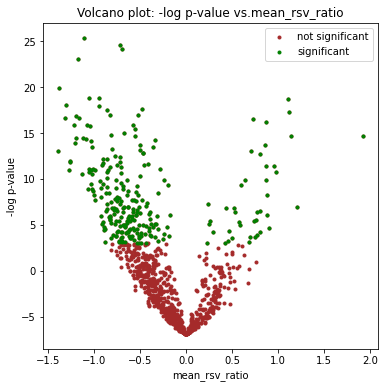

In [68]:
# Volcano plot for rsv 
fig,ax=plt.subplots(1,1,figsize=(6,6))
ax.scatter(df_matrix['mean_rsv_ratio'],-np.log(df_matrix['corrected_p_value_rsv']),marker = '.',c = 'brown',label = 'not significant')
ax.scatter(features_df['mean_rsv_ratio'],-np.log(features_df['corrected_p_value_rsv']),marker = '.',c = 'g',label = 'significant')
ax.set_title("Volcano plot: -log p-value vs.mean_rsv_ratio")
ax.set_xlabel("mean_rsv_ratio")
ax.set_ylabel("-log p-value")
plt.legend()
plt.show()

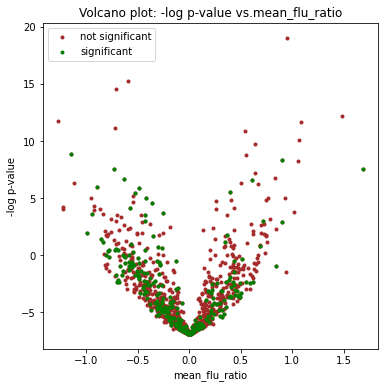

In [38]:
# Plotting the volcano plot for flu dataframe
fig,ax=plt.subplots(1,1,figsize=(6,6))
ax.scatter(df_matrix['mean_flu_ratio'],-np.log(df_matrix['corrected_p_value_flu']),marker = '.',c = 'brown',label = 'not significant')
ax.scatter(features_df['mean_flu_ratio'],-np.log(features_df['corrected_p_value_flu']),marker = '.',c = 'g',label = 'significant')
ax.set_title("Volcano plot: -log p-value vs.mean_flu_ratio")
ax.set_xlabel("mean_flu_ratio")
ax.set_ylabel("-log p-value")
plt.legend()
plt.show()

### Part2

In [39]:
# Transposing the matrix data
transposed_df_matrix = df_matrix.iloc[:,0:101].T
transposed_df_matrix

ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,1553608_a_at,1553611_s_at,1553612_at,1553613_s_at,1553614_a_at,1553618_at,1553619_a_at,1553620_at,1553622_a_at,1553623_at
GSM844133,1.180340,0.951730,1.027560,0.573574,1.824653,1.081050,0.757421,1.786350,0.643040,0.289988,...,1.531915,0.157632,0.826644,0.270440,2.140703,0.364516,1.919510,1.782946,2.666667,1.362577
GSM844134,1.344423,0.993080,0.861533,1.043946,0.314236,1.256930,1.606278,1.442136,2.198168,0.406214,...,0.296022,2.191553,1.042983,0.462264,1.889447,2.683871,2.171478,1.782946,3.186147,0.350925
GSM844135,0.630435,1.171978,1.588108,0.494884,0.241319,1.086422,0.630502,1.210683,3.389400,0.057537,...,1.768732,0.784170,0.325648,3.537736,0.427136,0.600000,1.471566,1.178295,5.255412,1.326936
GSM844136,1.343077,0.745698,0.598934,2.383290,1.000000,1.000000,0.901538,0.868853,1.665279,1.117541,...,1.739759,1.000000,1.000000,4.201835,2.626794,1.818182,0.354386,0.461539,0.173228,0.349328
GSM844137,1.365897,1.148742,1.000000,2.762236,2.750943,0.852475,1.000000,1.368853,0.694272,1.327306,...,1.026506,0.834847,1.316122,1.000000,1.133971,3.518182,1.887719,1.000000,1.881890,1.925144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM844229,1.053308,0.929346,0.346751,0.701730,0.213542,0.827235,0.688502,0.925816,1.533980,1.042578,...,1.123034,0.393083,1.176203,1.283019,0.241206,2.809677,2.404199,6.279070,0.597403,2.148047
GSM844230,0.542155,1.229731,0.890095,0.619949,0.104167,1.470181,1.858751,1.899110,1.312347,0.673188,...,1.167437,0.950449,0.942215,2.037736,3.160804,0.390323,1.494313,1.317829,3.679654,0.663468
GSM844231,0.886667,1.031932,0.292405,0.819143,1.437736,1.397632,0.662308,3.491803,0.421522,1.168174,...,0.057831,1.183320,0.446786,0.403670,0.133971,2.645455,0.431579,0.415385,1.787402,2.149712
GSM844232,0.698718,1.001820,1.669981,0.831885,1.494340,1.911756,0.622308,0.950820,2.047790,0.916817,...,0.368675,1.360859,1.300316,2.724771,4.086124,2.218182,1.689474,1.200000,2.771654,0.689060


In [40]:
# Transposing the features.csv dataset
transposed_features_df = features_df.iloc[:,0:101].T
# transposed_features_df.index = transposed_df_matrix.index.rename("Sample_geo_accession")
transposed_features_df

ID_REF,1007_s_at,121_at,1431_at,1487_at,1552257_a_at,1552261_at,1552264_a_at,1552289_a_at,1552295_a_at,1552299_at,...,1553573_s_at,1553574_at,1553582_a_at,1553583_a_at,1553584_at,1553591_at,1553594_a_at,1553602_at,1553605_a_at,1553607_at
GSM844133,1.180340,0.573574,0.289988,0.585574,0.572671,1.755274,1.096315,1.150712,0.389722,0.423824,...,2.115830,1.177962,0.200823,0.883532,0.126839,0.540146,0.541431,0.614943,0.361905,9.412430
GSM844134,1.344423,1.043946,0.406214,0.945302,1.337406,0.531646,1.439667,0.479136,0.769299,0.811285,...,2.810811,1.097521,1.161317,1.669474,1.123288,2.802920,0.735091,1.818008,16.723810,0.372881
GSM844135,0.630435,0.494884,0.057537,0.833378,0.598756,0.258439,1.411270,0.237604,0.578959,0.243260,...,1.166023,0.419835,0.562140,0.206796,0.121766,1.832117,0.967828,1.161877,3.561905,3.491525
GSM844136,1.343077,2.383290,1.117541,1.119890,1.406946,0.558140,1.000000,2.367470,3.047227,3.605042,...,1.280702,1.040293,0.852818,0.786284,0.818444,1.043103,0.926818,0.929577,0.361111,1.409962
GSM844137,1.365897,2.762236,1.327306,1.263923,1.714937,1.079070,0.864429,5.042168,3.442158,0.658263,...,0.824561,1.000000,1.000000,1.019936,5.025936,0.922414,1.514925,0.977113,0.416667,0.628352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM844229,1.053308,0.701730,1.042578,0.675539,0.635408,0.127637,2.429028,0.405498,0.149537,0.554232,...,3.976834,0.059504,0.487243,0.298577,0.204972,5.686132,0.419648,0.236590,14.761903,5.785310
GSM844230,0.542155,0.619949,0.673188,0.724381,0.874470,0.258439,1.098014,0.188512,0.352779,0.122884,...,1.806950,0.138843,0.227984,0.318908,0.113648,2.262774,0.579567,1.079502,14.057144,9.231638
GSM844231,0.886667,0.819143,1.168174,0.596845,0.607302,0.110078,0.526077,1.105422,1.256716,0.577031,...,1.298246,0.454212,0.848643,0.653907,1.383285,1.491379,1.487963,1.364437,1.305556,0.229885
GSM844232,0.698718,0.831885,0.916817,1.178052,1.150935,0.187597,1.032414,1.355422,1.094887,1.549020,...,1.614035,1.168498,0.608560,0.751196,2.429395,0.939655,1.634810,2.700704,5.666667,1.559387


In [41]:
df_meta = pd.read_csv('meta_data.csv',index_col = 0)
result_df = pd.concat([df_meta,transposed_features_df],axis = 1)
result_df

,age_months,gender,infection_status,1007_s_at,121_at,1431_at,1487_at,1552257_a_at,1552261_at,1552264_a_at,...,1553573_s_at,1553574_at,1553582_a_at,1553583_a_at,1553584_at,1553591_at,1553594_a_at,1553602_at,1553605_a_at,1553607_at
GSM844133,4.40,M,rsv,1.180340,0.573574,0.289988,0.585574,0.572671,1.755274,1.096315,...,2.115830,1.177962,0.200823,0.883532,0.126839,0.540146,0.541431,0.614943,0.361905,9.412430
GSM844134,2.00,F,rsv,1.344423,1.043946,0.406214,0.945302,1.337406,0.531646,1.439667,...,2.810811,1.097521,1.161317,1.669474,1.123288,2.802920,0.735091,1.818008,16.723810,0.372881
GSM844135,13.78,F,rsv,0.630435,0.494884,0.057537,0.833378,0.598756,0.258439,1.411270,...,1.166023,0.419835,0.562140,0.206796,0.121766,1.832117,0.967828,1.161877,3.561905,3.491525
GSM844136,72.00,M,none,1.343077,2.383290,1.117541,1.119890,1.406946,0.558140,1.000000,...,1.280702,1.040293,0.852818,0.786284,0.818444,1.043103,0.926818,0.929577,0.361111,1.409962
GSM844137,19.00,F,none,1.365897,2.762236,1.327306,1.263923,1.714937,1.079070,0.864429,...,0.824561,1.000000,1.000000,1.019936,5.025936,0.922414,1.514925,0.977113,0.416667,0.628352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM844229,1.97,F,rsv,1.053308,0.701730,1.042578,0.675539,0.635408,0.127637,2.429028,...,3.976834,0.059504,0.487243,0.298577,0.204972,5.686132,0.419648,0.236590,14.761903,5.785310
GSM844230,9.73,M,rsv,0.542155,0.619949,0.673188,0.724381,0.874470,0.258439,1.098014,...,1.806950,0.138843,0.227984,0.318908,0.113648,2.262774,0.579567,1.079502,14.057144,9.231638
GSM844231,18.00,F,influenza,0.886667,0.819143,1.168174,0.596845,0.607302,0.110078,0.526077,...,1.298246,0.454212,0.848643,0.653907,1.383285,1.491379,1.487963,1.364437,1.305556,0.229885
GSM844232,120.00,F,influenza,0.698718,0.831885,0.916817,1.178052,1.150935,0.187597,1.032414,...,1.614035,1.168498,0.608560,0.751196,2.429395,0.939655,1.634810,2.700704,5.666667,1.559387


In [42]:
# Encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
result_df['gender'] = le.fit_transform(result_df['gender'])
result_df['infection_status'] = le.fit_transform(result_df['infection_status'])
result_df

,age_months,gender,infection_status,1007_s_at,121_at,1431_at,1487_at,1552257_a_at,1552261_at,1552264_a_at,...,1553573_s_at,1553574_at,1553582_a_at,1553583_a_at,1553584_at,1553591_at,1553594_a_at,1553602_at,1553605_a_at,1553607_at
GSM844133,4.40,1,2,1.180340,0.573574,0.289988,0.585574,0.572671,1.755274,1.096315,...,2.115830,1.177962,0.200823,0.883532,0.126839,0.540146,0.541431,0.614943,0.361905,9.412430
GSM844134,2.00,0,2,1.344423,1.043946,0.406214,0.945302,1.337406,0.531646,1.439667,...,2.810811,1.097521,1.161317,1.669474,1.123288,2.802920,0.735091,1.818008,16.723810,0.372881
GSM844135,13.78,0,2,0.630435,0.494884,0.057537,0.833378,0.598756,0.258439,1.411270,...,1.166023,0.419835,0.562140,0.206796,0.121766,1.832117,0.967828,1.161877,3.561905,3.491525
GSM844136,72.00,1,1,1.343077,2.383290,1.117541,1.119890,1.406946,0.558140,1.000000,...,1.280702,1.040293,0.852818,0.786284,0.818444,1.043103,0.926818,0.929577,0.361111,1.409962
GSM844137,19.00,0,1,1.365897,2.762236,1.327306,1.263923,1.714937,1.079070,0.864429,...,0.824561,1.000000,1.000000,1.019936,5.025936,0.922414,1.514925,0.977113,0.416667,0.628352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM844229,1.97,0,2,1.053308,0.701730,1.042578,0.675539,0.635408,0.127637,2.429028,...,3.976834,0.059504,0.487243,0.298577,0.204972,5.686132,0.419648,0.236590,14.761903,5.785310
GSM844230,9.73,1,2,0.542155,0.619949,0.673188,0.724381,0.874470,0.258439,1.098014,...,1.806950,0.138843,0.227984,0.318908,0.113648,2.262774,0.579567,1.079502,14.057144,9.231638
GSM844231,18.00,0,0,0.886667,0.819143,1.168174,0.596845,0.607302,0.110078,0.526077,...,1.298246,0.454212,0.848643,0.653907,1.383285,1.491379,1.487963,1.364437,1.305556,0.229885
GSM844232,120.00,0,0,0.698718,0.831885,0.916817,1.178052,1.150935,0.187597,1.032414,...,1.614035,1.168498,0.608560,0.751196,2.429395,0.939655,1.634810,2.700704,5.666667,1.559387


In [43]:
np.unique(result_df['infection_status'])

array([0, 1, 2])

In [44]:
# Standardizing the columns
from sklearn.preprocessing import StandardScaler
stz = StandardScaler()
x = stz.fit_transform(result_df)
x

array([[-3.41204668e-01,  9.90147543e-01,  9.03683736e-01, ...,
        -5.59006193e-01, -4.02911122e-01,  1.60714806e+00],
       [-4.53818375e-01, -1.00995049e+00,  9.03683736e-01, ...,
         7.33558645e-01, -4.19964740e-03, -6.92065927e-01],
       [ 9.89272397e-02, -1.00995049e+00,  9.03683736e-01, ...,
         2.86168680e-02, -3.24932624e-01,  1.01162794e-01],
       ...,
       [ 2.96939676e-01, -1.00995049e+00, -1.43662543e+00, ...,
         2.46244940e-01, -3.79915976e-01, -7.28437102e-01],
       [ 5.08302225e+00, -1.00995049e+00, -1.43662543e+00, ...,
         1.68192123e+00, -2.73643195e-01, -3.90277580e-01],
       [ 1.70461102e+00,  9.90147543e-01, -1.43662543e+00, ...,
        -9.87037097e-01, -3.90746323e-01, -7.67418024e-01]])

In [45]:
# Applying principal component analysis to our data
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_component = pca.fit_transform(x)
pca_component.shape

(101, 2)

In [46]:
#Converting the principal component into a data frame for a better visual
pca_component1 = np.vstack((pca_component.T,df_meta['infection_status'])).T
principal_df1 = pd.DataFrame(data = pca_component1
             , columns = ['principal component 1', 'principal component 2','label'])
principal_df1

,principal component 1,principal component 2,label
0,-3.188067,3.134284,rsv
1,-1.379496,7.019196,rsv
2,-9.44428,-0.922064,rsv
3,9.140734,-5.581489,none
4,18.732001,-1.548549,none
...,...,...,...
96,-6.729161,2.321041,rsv
97,-6.199045,3.197321,rsv
98,-4.593353,-3.86888,influenza
99,-3.29956,0.257258,influenza


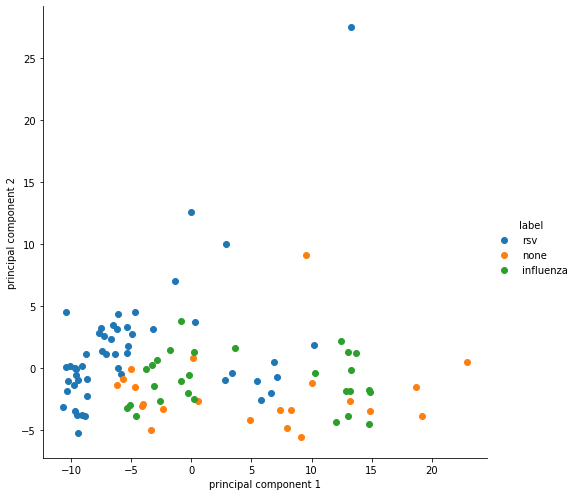

In [47]:
import seaborn as sns
sns.FacetGrid(principal_df1,hue = 'label',size = 7).map(plt.scatter,'principal component 1','principal component 2').add_legend()

In [48]:
# creating a dataframe having pcs for male and female
pca_component2 = np.vstack((pca_component.T,df_meta['gender'])).T
principal_df2 = pd.DataFrame(data = pca_component2
             , columns = ['principal component 1', 'principal component 2','label'])
principal_df2

,principal component 1,principal component 2,label
0,-3.188067,3.134284,M
1,-1.379496,7.019196,F
2,-9.44428,-0.922064,F
3,9.140734,-5.581489,M
4,18.732001,-1.548549,F
...,...,...,...
96,-6.729161,2.321041,F
97,-6.199045,3.197321,M
98,-4.593353,-3.86888,F
99,-3.29956,0.257258,F


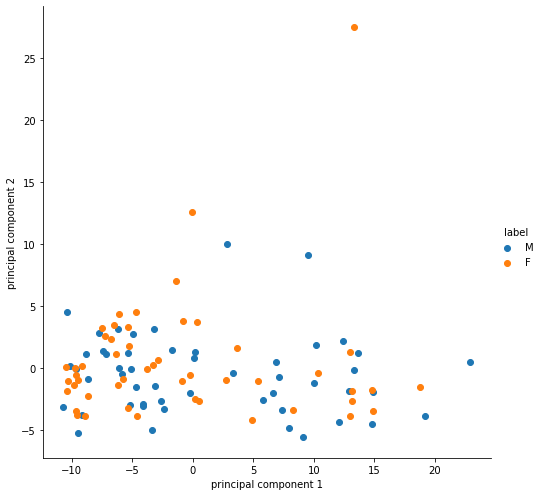

In [49]:
# Plotting the principla component 1 vs principal component2
sns.FacetGrid(principal_df2,hue = 'label',size = 7).map(plt.scatter,'principal component 1','principal component 2').add_legend()

In [50]:
pca_component3 = np.vstack((pca_component.T,df_meta['age_months']>6)).T
principal_df3 = pd.DataFrame(data = pca_component3
             , columns = ['principal component 1', 'principal component 2','label'])
principal_df3

,principal component 1,principal component 2,label
0,-3.188067,3.134284,0.0
1,-1.379496,7.019196,0.0
2,-9.444280,-0.922064,1.0
3,9.140734,-5.581489,1.0
4,18.732001,-1.548549,1.0
...,...,...,...
96,-6.729161,2.321041,0.0
97,-6.199045,3.197321,1.0
98,-4.593353,-3.868880,1.0
99,-3.299560,0.257258,1.0


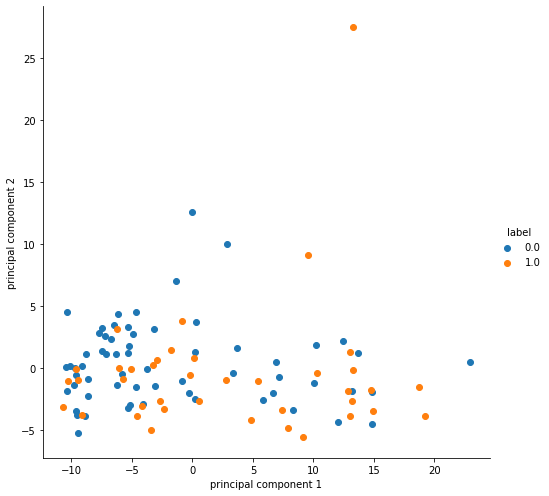

In [51]:
sns.FacetGrid(principal_df3,hue = 'label',size = 7).map(plt.scatter,'principal component 1','principal component 2').add_legend()

### Part3

In [52]:
# getting independent variable in X and dependent variable in y
X = result_df.drop(['infection_status'],axis = 1)
y = result_df['infection_status']
X.head()

,age_months,gender,1007_s_at,121_at,1431_at,1487_at,1552257_a_at,1552261_at,1552264_a_at,1552289_a_at,...,1553573_s_at,1553574_at,1553582_a_at,1553583_a_at,1553584_at,1553591_at,1553594_a_at,1553602_at,1553605_a_at,1553607_at
GSM844133,4.40,1,1.180340,0.573574,0.289988,0.585574,0.572671,1.755274,1.096315,1.150712,...,2.115830,1.177962,0.200823,0.883532,0.126839,0.540146,0.541431,0.614943,0.361905,9.412430
GSM844134,2.00,0,1.344423,1.043946,0.406214,0.945302,1.337406,0.531646,1.439667,0.479136,...,2.810811,1.097521,1.161317,1.669474,1.123288,2.802920,0.735091,1.818008,16.723810,0.372881
GSM844135,13.78,0,0.630435,0.494884,0.057537,0.833378,0.598756,0.258439,1.411270,0.237604,...,1.166023,0.419835,0.562140,0.206796,0.121766,1.832117,0.967828,1.161877,3.561905,3.491525
GSM844136,72.00,1,1.343077,2.383290,1.117541,1.119890,1.406946,0.558140,1.000000,2.367470,...,1.280702,1.040293,0.852818,0.786284,0.818444,1.043103,0.926818,0.929577,0.361111,1.409962
GSM844137,19.00,0,1.365897,2.762236,1.327306,1.263923,1.714937,1.079070,0.864429,5.042168,...,0.824561,1.000000,1.000000,1.019936,5.025936,0.922414,1.514925,0.977113,0.416667,0.628352


In [53]:
# Splitting the data into train_test (70:30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1)
len(X_train),len(X_test),len(y_train),len(y_test)

(70, 31, 70, 31)

In [54]:
# Training RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import accuracy_score,f1_score
Model1 = RandomForestClassifier()
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.33      0.67      0.44         3
           2       0.89      0.70      0.78        23

    accuracy                           0.71        31
   macro avg       0.60      0.72      0.63        31
weighted avg       0.78      0.71      0.73        31

RandomForestClassifier:> 0.7096774193548387


In [55]:
# Standardizing the trianing and test set
X_std_train = stz.fit_transform(X_train)
X_std_test = stz.fit_transform(X_test)

In [56]:
Model1 = RandomForestClassifier()
Model1.fit(X_std_train,y_train)
y_pred = Model1.predict(X_std_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.71      0.56      0.63         9
           1       0.33      0.50      0.40         4
           2       0.72      0.72      0.72        18

    accuracy                           0.65        31
   macro avg       0.59      0.59      0.58        31
weighted avg       0.67      0.65      0.65        31

RandomForestClassifier:> 0.6451612903225806


In [57]:
# Taking the classification report as a dictionary
report = classification_report(y_pred,y_test,output_dict = True)
report

{'0': {'precision': 0.7142857142857143,
  'recall': 0.5555555555555556,
  'f1-score': 0.6250000000000001,
  'support': 9},
 '1': {'precision': 0.3333333333333333,
  'recall': 0.5,
  'f1-score': 0.4,
  'support': 4},
 '2': {'precision': 0.7222222222222222,
  'recall': 0.7222222222222222,
  'f1-score': 0.7222222222222222,
  'support': 18},
 'accuracy': 0.6451612903225806,
 'macro avg': {'precision': 0.5899470899470899,
  'recall': 0.5925925925925926,
  'f1-score': 0.5824074074074074,
  'support': 31},
 'weighted avg': {'precision': 0.6697388632872504,
  'recall': 0.6451612903225806,
  'f1-score': 0.6524193548387097,
  'support': 31}}

In [58]:
# Converting it into a DataFrame
report_df = pd.DataFrame(report)
report_df

,0,1,2,accuracy,macro avg,weighted avg
precision,0.714286,0.333333,0.722222,0.645161,0.589947,0.669739
recall,0.555556,0.500000,0.722222,0.645161,0.592593,0.645161
f1-score,0.625000,0.400000,0.722222,0.645161,0.582407,0.652419
support,9.000000,4.000000,18.000000,0.645161,31.000000,31.000000


In [59]:
# Transposing the report dataframe
report_df.T

,precision,recall,f1-score,support
0,0.714286,0.555556,0.625000,9.000000
1,0.333333,0.500000,0.400000,4.000000
2,0.722222,0.722222,0.722222,18.000000
accuracy,0.645161,0.645161,0.645161,0.645161
macro avg,0.589947,0.592593,0.582407,31.000000
weighted avg,0.669739,0.645161,0.652419,31.000000


In [60]:
biomarkers = report_df.to_csv('biomarkers.csv')

In [61]:
for i in range(10):
    Model1 = RandomForestClassifier()
    Model1.fit(X_std_train,y_train)
    y_pred = Model1.predict(X_std_test)
    print(classification_report(y_pred,y_test))
    print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      0.50      0.63        12
           1       0.50      1.00      0.67         3
           2       0.72      0.81      0.76        16

    accuracy                           0.71        31
   macro avg       0.69      0.77      0.69        31
weighted avg       0.75      0.71      0.70        31

RandomForestClassifier:> 0.7096774193548387
              precision    recall  f1-score   support

           0       0.71      0.42      0.53        12
           1       0.33      1.00      0.50         2
           2       0.72      0.76      0.74        17

    accuracy                           0.65        31
   macro avg       0.59      0.73      0.59        31
weighted avg       0.69      0.65      0.64        31

RandomForestClassifier:> 0.6451612903225806
              precision    recall  f1-score   support

           0       1.00      0.58      0.74        12
           1       0.33      0.67      0.

In [62]:
# Creating confusion matrix
from sklearn import metrics
metrics.confusion_matrix(y_pred,y_test)

array([[ 7,  1,  3],
       [ 0,  2,  1],
       [ 0,  3, 14]], dtype=int64)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(pca_component,y,test_size=0.30,random_state=1)
len(X_train),len(X_test),len(y_train),len(y_test)
X_train.shape

(70, 2)

In [64]:
Model1 = RandomForestClassifier()
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.43      0.38      0.40         8
           1       0.33      0.33      0.33         6
           2       0.83      0.88      0.86        17

    accuracy                           0.65        31
   macro avg       0.53      0.53      0.53        31
weighted avg       0.63      0.65      0.64        31

RandomForestClassifier:> 0.6451612903225806
